In [1]:
# Import all the necessary libraries

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Model
from tensorflow.keras.layers import (
    Flatten, 
    Conv2D,
    MaxPooling2D, 
    MaxPool2D,
    Dense, 
    BatchNormalization, 
    Dropout,
    Input,
    ZeroPadding2D
  )
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.preprocessing.image import load_img, img_to_array

import matplotlib.pyplot as plt
import numpy as np
import random
import os
import cv2

In [2]:
!wget 'https://cainvas.ai-tech.systems:9000/user/kkharbanda90/lab//home/jupyter-kkharbanda90/archive.zip'

!unzip -qo archive.zip 
!rm archive.zip

--2021-08-20 08:56:55--  https://cainvas.ai-tech.systems:9000/user/kkharbanda90/lab//home/jupyter-kkharbanda90/archive.zip
Resolving cainvas.ai-tech.systems (cainvas.ai-tech.systems)... 65.1.254.242
Connecting to cainvas.ai-tech.systems (cainvas.ai-tech.systems)|65.1.254.242|:9000... connected.
HTTP request sent, awaiting response... 302 Found
Location: /hub/api/oauth2/authorize?client_id=jupyterhub-user-kkharbanda90&redirect_uri=%2Fuser%2Fkkharbanda90%2Foauth_callback&response_type=code&state=eyJ1dWlkIjogImQ5Yzc0YTk4YzgxODRlZWNiYTcyOTUzYzhkZDFmOTk3IiwgIm5leHRfdXJsIjogIi91c2VyL2traGFyYmFuZGE5MC9sYWIvL2hvbWUvanVweXRlci1ra2hhcmJhbmRhOTAvYXJjaGl2ZS56aXAifQ [following]
--2021-08-20 08:56:55--  https://cainvas.ai-tech.systems:9000/hub/api/oauth2/authorize?client_id=jupyterhub-user-kkharbanda90&redirect_uri=%2Fuser%2Fkkharbanda90%2Foauth_callback&response_type=code&state=eyJ1dWlkIjogImQ5Yzc0YTk4YzgxODRlZWNiYTcyOTUzYzhkZDFmOTk3IiwgIm5leHRfdXJsIjogIi91c2VyL2traGFyYmFuZGE5MC9sYWIvL2hvbWUvanVweX

In [2]:
os.getcwd()

'/home/jupyter-kkharbanda90'

In [3]:
#https://cainvas.ai-tech.systems:9000/user/kkharbanda90/lab//home/jupyter-kkharbanda90/archize.zip

In [2]:
data_path = os.path.join( os.getcwd(), "Breast Cancer Patients MRI's")
if data_path:
    print(True)

True


In [3]:
train_path = os.path.join(data_path, 'train')
validation_path = os.path.join(data_path, 'validation')

In [76]:
# Get image as numpy array
def load_image(name, path):
    img_path = os.path.join(path, name)
    img = cv2.imread(img_path)
   # img = load_img(img_path, target_size = (256, 256))
    return img

# Plot numpy array
def plot_image(img, name, title):
    plt.imshow(img)
    plt.suptitle(title)
    plt.title(name)

# Plot a grid of examples
def plot_grid(img_names, img_root,  title ,rows=2, cols=3):
    fig = plt.figure(figsize=(8,8))

    for i,name in enumerate(img_names):
        #print(os.path.join(img_root, name))
        fig.add_subplot(rows,cols,i+1)
        img = load_image(name, img_root)
        plt.axis("off")
        plot_image(img, name, title)

    plt.show()

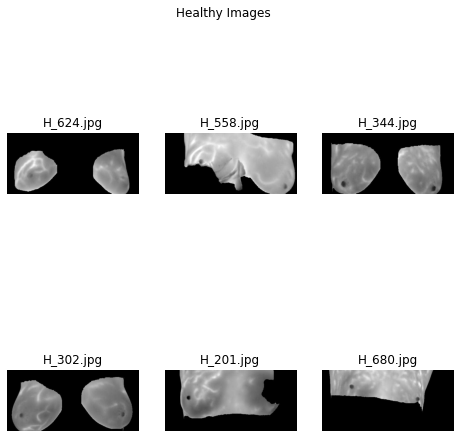

In [77]:
healthy_path = os.path.join(train_path, "Healthy")
healthy_images = os.listdir(healthy_path)
plot_grid(healthy_images[-6:], healthy_path, title = "Healthy Images")

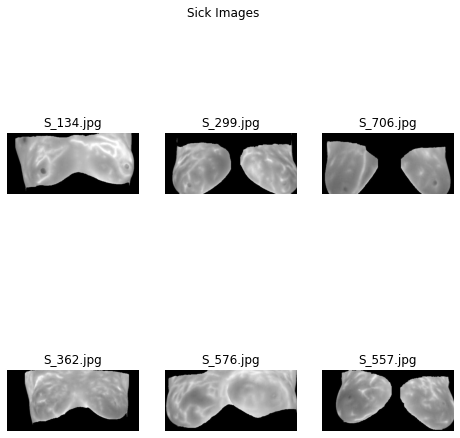

In [79]:
sick_path = os.path.join(train_path, "Sick")
sick_images = os.listdir(sick_path)
plot_grid(sick_images[-6:], sick_path, title = "Sick Images")

In [4]:
train_image_generator = ImageDataGenerator(
    rescale = 1.0/255.0,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2, 
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)

valid_image_genrator = ImageDataGenerator(rescale = 1.0/255.0)

In [34]:
training_images = train_image_generator.flow_from_directory(train_path, 
                                                            target_size = (256*3,256*3),
                                                            class_mode = 'categorical', 
                                                            batch_size = 20,
                                                            classes = ['Healthy', 'Sick']
                                                            #color_mode="grayscale"
                                                           )

Found 1401 images belonging to 2 classes.


In [35]:
validation_images = valid_image_genrator.flow_from_directory(validation_path, 
                                                             target_size = (256*3,256*3), 
                                                             class_mode = 'categorical', 
                                                             batch_size = 20,
                                                             classes = ['Healthy', 'Sick']
                                                            #color_mode="grayscale"
                                                            )

Found 80 images belonging to 2 classes.


In [8]:
#Defining our callback function
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs = {}):
    if logs.get('val_accuracy') > 0.95:
      print("\nReached 95% training accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

In [8]:
# Function to plot "accuracy vs epoch" graphs and "loss vs epoch" graphs for training and validation data
def plot_metrics(model_name, metric = 'accuracy'):
    if metric == 'loss':
        plt.title("Loss Values")
        plt.plot(model_name.history['loss'], label = 'train')
        plt.plot(model_name.history['val_loss'], label = 'test')
        plt.legend()
        plt.show()
    else:
        plt.title("Accuracy Values")
        plt.plot(model_name.history['accuracy'], label='train') 
        plt.plot(model_name.history['val_accuracy'], label='test') 
        plt.legend()
        plt.show()

In [80]:
# Defining the architecture for our neural network model
model=Sequential()



model.add(Conv2D(128,(3,3), activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())



model.add(Conv2D(128,(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))



model.add(Conv2D(64,(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32,(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))





model.add(Conv2D(32,(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(16,(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(100,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(200,activation='relu'))
model.add(Dense(2, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 128)     3584      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 128)     0         
_________________________________________________________________
batch_normalization (BatchNo (None, 127, 127, 128)     512       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 128)     147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 64)        73792     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 64)        0

In [81]:
# Compiling the model using Adam optimizer having a learning rate of 0.00001

model.compile(loss="categorical_crossentropy",
              optimizer=Adam(lr = 10 ** -5),
              metrics=['accuracy'])

In [12]:
# Training the model
history = model.fit_generator(training_images, steps_per_epoch = 30, 
                                          epochs = 50, validation_data= validation_images, validation_steps = 1
                                          )

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
30/30 [==============================] - 7s 228ms/step - loss: 0.6916 - accuracy: 0.5043 - val_loss: 0.6909 - val_accuracy: 0.6000
Epoch 2/50
30/30 [==============================] - 7s 223ms/step - loss: 0.6907 - accuracy: 0.5198 - val_loss: 0.6951 - val_accuracy: 0.3500
Epoch 3/50
30/30 [==============================] - 7s 219ms/step - loss: 0.6934 - accuracy: 0.4854 - val_loss: 0.6893 - val_accuracy: 0.6000
Epoch 4/50
30/30 [==============================] - 7s 218ms/step - loss: 0.6882 - accuracy: 0.5043 - val_loss: 0.6935 - val_accuracy: 0.4500
Epoch 5/50
30/30 [==============================] - 7s 223ms/step - loss: 0.6908 - accuracy: 0.5017 - val_loss: 0.6864 - val_accuracy: 0.6500
Epoch 6/50
30/30 [==============================] - 7s 222ms/step - loss: 0.6911 - accuracy: 0.4967 - val_loss: 0.6919 - val_accuracy: 0.4500
Epoch 7/50
30/30 [==============================] - 7s 224ms/step - loss

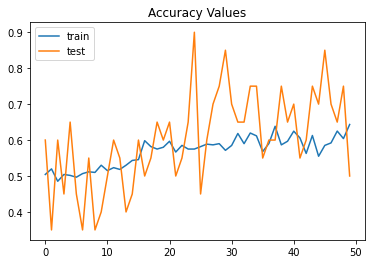

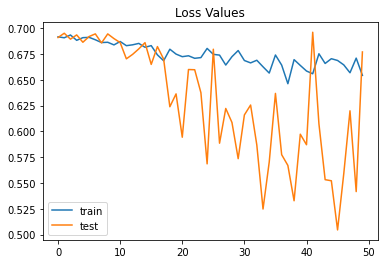

In [13]:
plot_metrics(history, 'accuracy')
plot_metrics(history, 'loss')

In [14]:
# Saving our trained model
from tensorflow.keras.models import save_model
if os.path.isfile('best_model.h5') is False:
    model.save('best_model.h5')

In [33]:
# Loading our saved model
from tensorflow.keras.models import load_model
model = load_model('best_model.h5')
if model:
    print(True)

True


In [95]:
# Select a random image from the HEALTHY dataset:
file_name = random.choice(os.listdir(os.path.join(os.getcwd(), "Breast Cancer Patients MRI's", "train", "Healthy")))
img_healthy_path = os.path.join(os.getcwd(), "Breast Cancer Patients MRI's", "train", "Healthy", file_name)

img_healthy = load_img(img_healthy_path, target_size = (256, 256))
img_healthy = img_to_array(img_healthy)
img_healthy = img_healthy / 255.0
img_healthy = np.expand_dims(img_healthy, axis = 0)

y_pred = model.predict(img_healthy)
cls = np.argmax(y_pred)
if cls == 0:
    print("Healthy")
else:
    print("Sick")

Healthy


In [139]:
# Select a random image from the SICK dataset:
file_name = random.choice(os.listdir(os.path.join(os.getcwd(), "Breast Cancer Patients MRI's", "train", "Sick")))
img_healthy_path = os.path.join(os.getcwd(), "Breast Cancer Patients MRI's", "train", "Sick", file_name)

img_healthy = load_img(img_healthy_path, target_size = (256, 256))
img_healthy = img_to_array(img_healthy)
img_healthy = img_healthy / 255.0
img_healthy = np.expand_dims(img_healthy, axis = 0)

y_pred = model.predict(img_healthy)
cls = np.argmax(y_pred)
if cls == 0:
    print("Healthy")
else:
    print("Sick")

Sick


In [36]:
# Defining the architecture for our neural network model
model=Sequential()



model.add(Conv2D(128,(3,3), activation='relu', input_shape=(256*3,256*3,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())



model.add(Conv2D(64,(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))



model.add(Conv2D(64,(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64,(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32,(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))



model.add(Conv2D(32,(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(16,(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(16,(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())

model.add(Dense(200,activation='relu'))
model.add(Dense(150,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(2, activation='softmax'))
model.summary()

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_179 (Conv2D)          (None, 766, 766, 128)     3584      
_________________________________________________________________
max_pooling2d_175 (MaxPoolin (None, 383, 383, 128)     0         
_________________________________________________________________
batch_normalization_25 (Batc (None, 383, 383, 128)     512       
_________________________________________________________________
conv2d_180 (Conv2D)          (None, 381, 381, 64)      73792     
_________________________________________________________________
max_pooling2d_176 (MaxPoolin (None, 190, 190, 64)      0         
_________________________________________________________________
conv2d_181 (Conv2D)          (None, 188, 188, 64)      36928     
_________________________________________________________________
max_pooling2d_177 (MaxPoolin (None, 94, 94, 64)      

In [37]:
# Compiling the model using Adam optimizer having a learning rate of 0.00001

model.compile(loss="categorical_crossentropy",
              optimizer=Adam(lr = 10 ** -5),
              metrics=['accuracy'])

In [38]:
# Training the model
history = model.fit_generator(training_images, steps_per_epoch = 30, 
                                          epochs = 50, validation_data= validation_images, validation_steps = 1
                                          )

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50


ResourceExhaustedError:  OOM when allocating tensor with shape[20,128,383,383] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[node sequential_25/batch_normalization_25/FusedBatchNormV3 (defined at <ipython-input-38-e5f36500ca87>:3) ]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.
 [Op:__inference_train_function_10297]

Function call stack:
train_function
